In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
os.getcwd()

'D:\\Documents\\Schoolwork\\Grad School - Fall 2022\\Capstone\\Code\\Prediction-of-commercial-insurance-payments-for-surgical-procedure-using-DataRobot'

In [3]:
path = os.getcwd()

In [4]:
group_df = pd.read_excel(path+
    '/Data_Files/JnJ_Files/cost_discharge_physpec_ippct.xlsx')

In [5]:
group_df.head()

,group,pat_cost,discharge_to_home_pct,phy_spec,IP_pct
0,ankle_fix,16741.5136,0.621714,ORTHOPEDIC SURGERY (ORS),0.542798
1,ant_cerv_fusion,18848.1697,0.846973,NEUROLOGICAL SURGERY (NS),0.575495
2,ant_tls_fusion,49478.1242,0.596666,ORTHOPEDIC SURGERY (ORS),0.983543
3,bariatric,14585.5550,0.945035,GENERAL SURGERY (GS),0.911311
4,breast reconstruction,13690.8043,0.929970,PLASTIC SURGERY (PS),0.246127


In [6]:
group_df.shape

(50, 5)

### Visualizing the numerical features

<IPython.core.display.Javascript object>


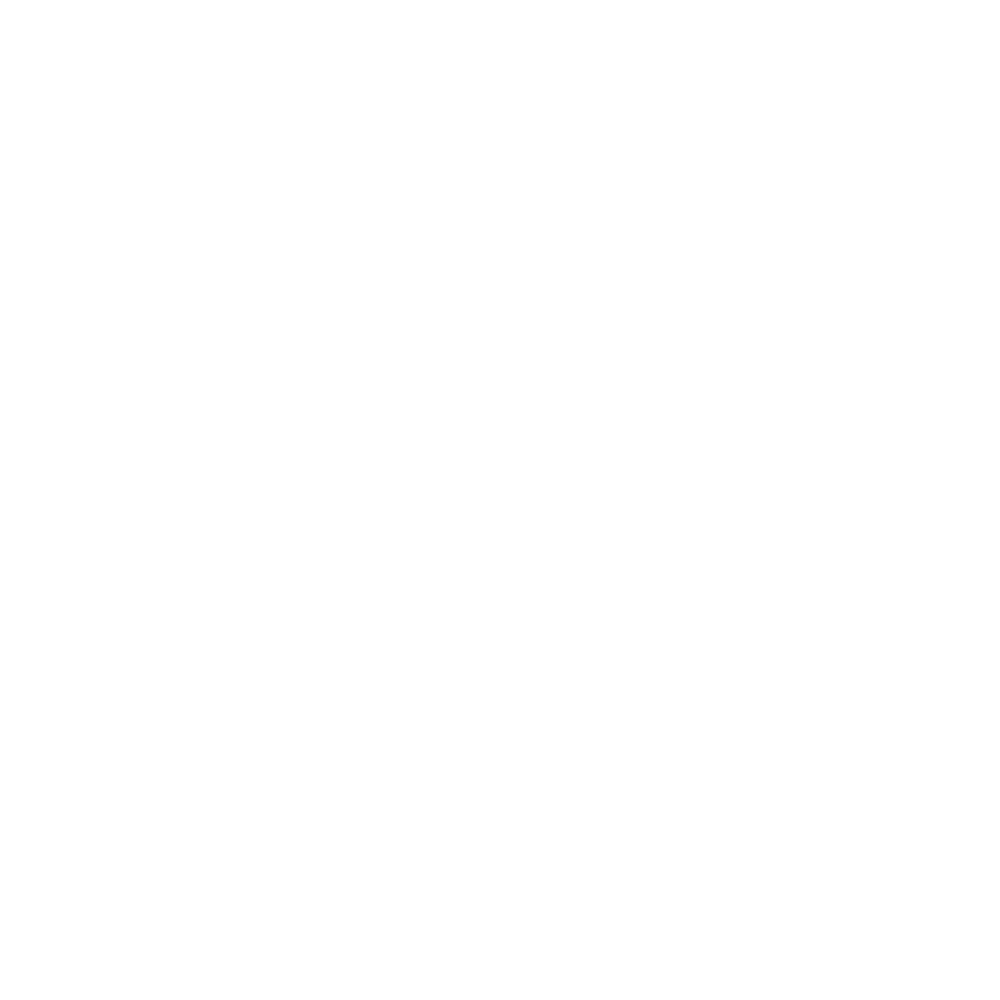

In [7]:
sns.set(style = "darkgrid")

%matplotlib notebook
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')

x = group_df['pat_cost']
y = group_df['discharge_to_home_pct']
z = group_df['IP_pct']

ax.set_xlabel("Patient Cost")
ax.set_ylabel("Discharge to Home Percentage")
ax.set_zlabel("Surgery Complexity")

ax.scatter(x, y, z)

plt.show()


### Performing preliminary clustering

#### K-MEANS

In [8]:
X = group_df[['pat_cost','discharge_to_home_pct','IP_pct']].values

In [9]:
display(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
display(X_scaled)

array([[1.67415136e+04, 6.21713870e-01, 5.42797640e-01],
       [1.88481697e+04, 8.46973380e-01, 5.75494630e-01],
       [4.94781242e+04, 5.96665910e-01, 9.83542900e-01],
       [1.45855550e+04, 9.45035010e-01, 9.11311130e-01],
       [1.36908043e+04, 9.29969530e-01, 2.46127420e-01],
       [7.32423000e+03, 9.83471640e-01, 0.00000000e+00],
       [6.34402550e+03, 9.77561710e-01, 0.00000000e+00],
       [2.23076292e+04, 9.26093860e-01, 2.79960070e-01],
       [2.33101182e+04, 9.92888040e-01, 0.00000000e+00],
       [2.32272749e+04, 9.94480510e-01, 0.00000000e+00],
       [1.77574340e+04, 9.92290660e-01, 0.00000000e+00],
       [2.15642802e+04, 9.92072310e-01, 0.00000000e+00],
       [1.20690582e+04, 9.38186700e-01, 7.59746100e-02],
       [2.83956113e+04, 5.71013840e-01, 9.80531100e-01],
       [2.99362600e+04, 2.77042980e-01, 9.83244900e-01],
       [5.89675570e+03, 9.82442040e-01, 0.00000000e+00],
       [3.85519350e+04, 5.89054680e-01, 9.94721780e-01],
       [1.86743563e+04, 8.15277

array([[-0.21193939, -0.52395107,  0.15101485],
       [-0.01579425,  0.3941749 ,  0.23203252],
       [ 2.83607923, -0.62604302,  1.24310796],
       [-0.41267495,  0.79386026,  1.0641297 ],
       [-0.4959828 ,  0.73245549, -0.58408439],
       [-1.08875758,  0.95052254, -1.19394701],
       [-1.18002181,  0.9264345 , -1.19394701],
       [ 0.30630681,  0.71665881, -0.50025274],
       [ 0.39964589,  0.98890246, -1.19394701],
       [ 0.39193257,  0.99539314, -1.19394701],
       [-0.11734974,  0.98646763, -1.19394701],
       [ 0.23709557,  0.98557766, -1.19394701],
       [-0.64697926,  0.76594752, -1.00569462],
       [ 0.87314261, -0.73059724,  1.23564522],
       [ 1.01658831, -1.92878098,  1.24236957],
       [-1.22166591,  0.94632604, -1.19394701],
       [ 1.81877086, -0.65706532,  1.27080736],
       [-0.03197755,  0.26498729,  0.1683574 ],
       [ 0.11426069, -2.70815383,  1.26564603],
       [-0.81592175,  0.88044422, -0.30064959],
       [ 2.07486382, -2.05083147,  1.276

In [10]:
# determining the optimal number of clusters
clusters = np.arange(1,10)
inertia = []
for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

C:\Users\rogmo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rogmo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rogmo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rogmo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

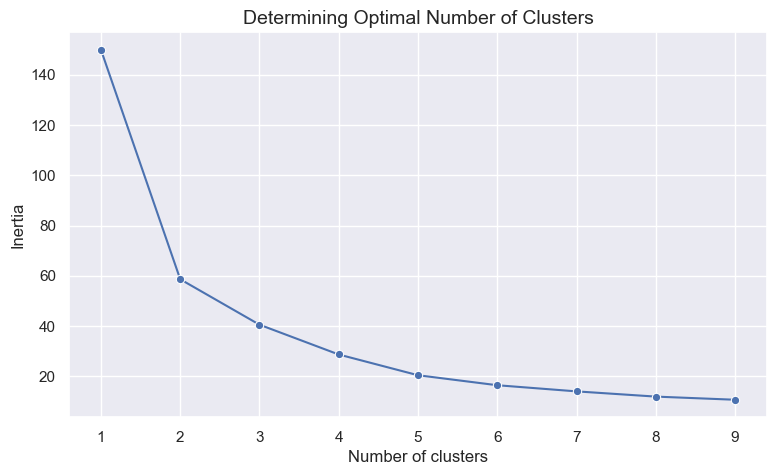

In [11]:
%matplotlib inline
plt.figure(figsize = (9,5))
sns.lineplot(x = clusters, y = inertia, marker = 'o')
plt.xlabel('Number of clusters', fontsize = 12)
plt.ylabel('Inertia', fontsize = 12)
plt.title('Determining Optimal Number of Clusters', fontsize = 14)
plt.savefig(path+'/figures/kmeans_optimal_clusters.png', bbox_inches = 'tight')
plt.show()

##### Optimal number of clusters = 3

In [12]:
optimal_model = KMeans(n_clusters = 3).fit_predict(X)
optimal_model_two = KMeans(n_clusters = 2).fit_predict(X)

C:\Users\rogmo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rogmo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
cluster_df = group_df.copy()
cluster_df['cluster'] = optimal_model

In [14]:
cluster_df.groupby(by = 'cluster').size()

cluster
0     5
1    21
2    24
dtype: int64

In [15]:
cluster_df[cluster_df.cluster == 1]

,group,pat_cost,discharge_to_home_pct,phy_spec,IP_pct,cluster
3,bariatric,14585.5550,0.945035,GENERAL SURGERY (GS),0.911311,1
4,breast reconstruction,13690.8043,0.929970,PLASTIC SURGERY (PS),0.246127,1
5,bsp,7324.2300,0.983472,OTOLARYNGOLOGY (OTO),0.000000,1
6,bunionectomy,6344.0255,0.977562,PODIATRY (POD),0.000000,1
12,clavicle fixation,12069.0582,0.938187,ORTHOPEDIC SURGERY (ORS),0.075975,1
15,fess,5896.7557,0.982442,OTOLARYNGOLOGY (OTO),0.000000,1
19,hysterect,10254.5665,0.966278,OBSTETRICS/GYNECOLOGY (OBG),0.360516,1
21,kidney ablation,8390.7604,0.925648,UROLOGY (U),0.263984,1
23,lap appendectomy,6433.5226,0.988582,GENERAL SURGERY (GS),0.000000,1
24,liver ablation,15113.2402,0.878414,GENERAL SURGERY (GS),0.413160,1


<IPython.core.display.Javascript object>


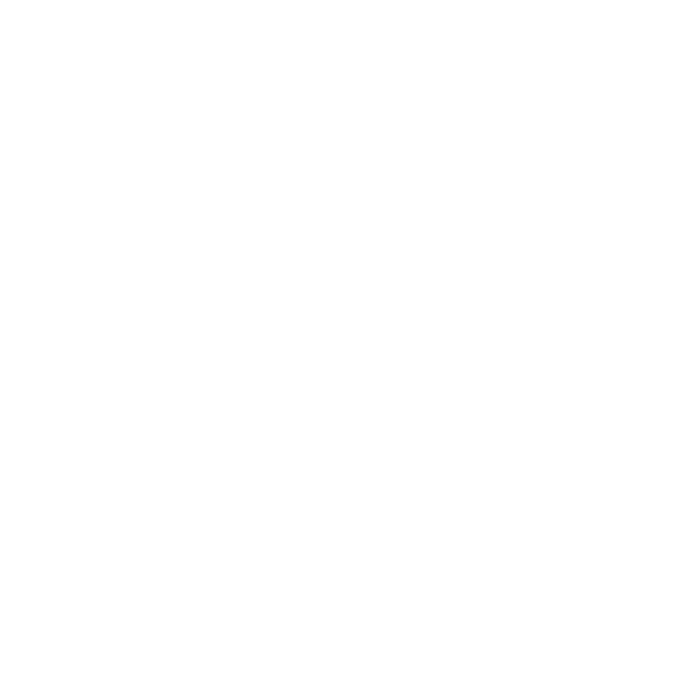

In [16]:
sns.set(style = "darkgrid")

%matplotlib notebook
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection = '3d')

x = cluster_df['pat_cost']
y = cluster_df['discharge_to_home_pct']
z = cluster_df['IP_pct']

col=cluster_df['cluster'].map({0:'r',1:'g',2:'b'})

ax.set_xlabel("Patient Cost")
ax.set_ylabel("Discharge to Home Percentage")
ax.set_zlabel("Surgery Complexity")

ax.scatter(x, y, z, color = col)

plt.show()

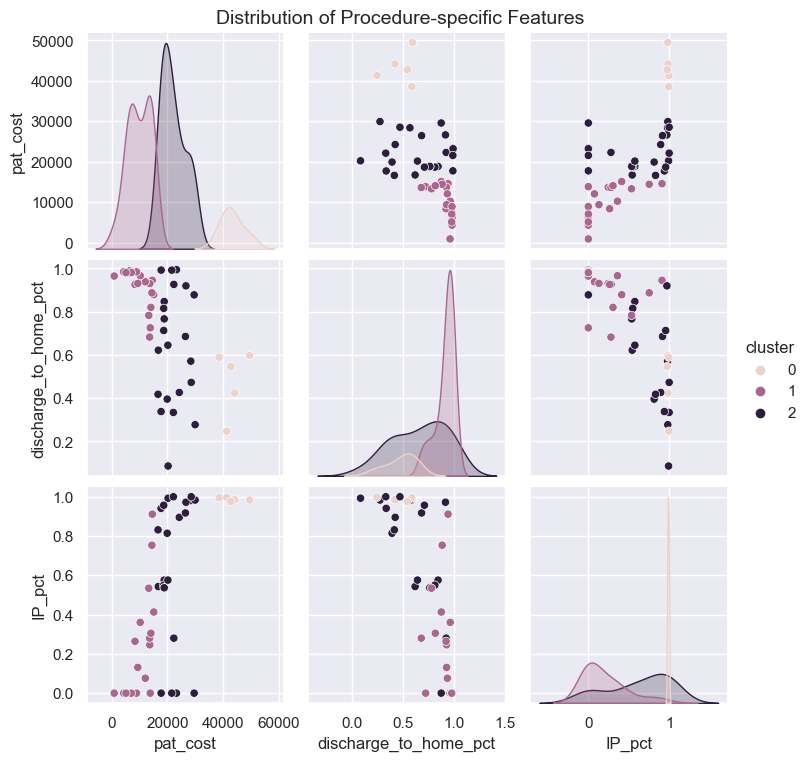

In [17]:
%matplotlib inline
f = sns.pairplot(cluster_df, hue = 'cluster')
f.fig.suptitle('Distribution of Procedure-specific Features', y = 1.01, fontsize = 14)
plt.savefig(path+'/figures/pairplotFeatures_kmeans_optimal_clusters.png', bbox_inches = 'tight')
plt.show()

In [18]:
print(silhouette_score(cluster_df[['pat_cost','discharge_to_home_pct','IP_pct']].values, cluster_df[['cluster']]))
print(silhouette_score(cluster_df[['pat_cost','discharge_to_home_pct','IP_pct']].values, optimal_model_two))

0.584349421094123
0.5950341763945363


C:\Users\rogmo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
